In [3]:
# Matplotlib is low level tool , seaborn is high level stastical graphical library based on matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Line plots

In [4]:
#Series and data frame have a plot  attribute to plot the data using matplotlib
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))

<Axes: >

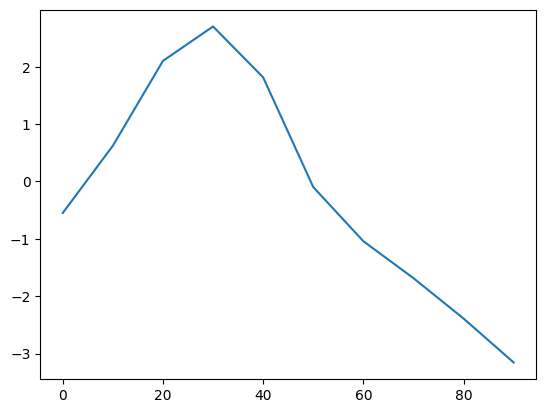

In [7]:
s.plot() # It has many attribute like xlim, ylim , xticks, yticks, label, ax

In [8]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))

In [9]:
df

,A,B,C,D
0,-0.275204,-0.682711,-0.094914,0.991452
10,0.413546,1.207993,0.340217,1.825159
20,1.340409,0.497744,1.949820,0.339919
30,0.423379,-0.606552,1.094685,1.343670
40,0.981391,-1.542149,0.965585,1.216773
50,1.586761,-0.680408,3.005576,2.409418
60,0.608077,-1.233706,1.497303,3.598223
70,0.354021,-0.659764,3.248386,5.015700
80,0.536723,1.614925,3.583953,3.187933
90,-0.204152,1.658389,2.722356,3.233285


<Axes: >

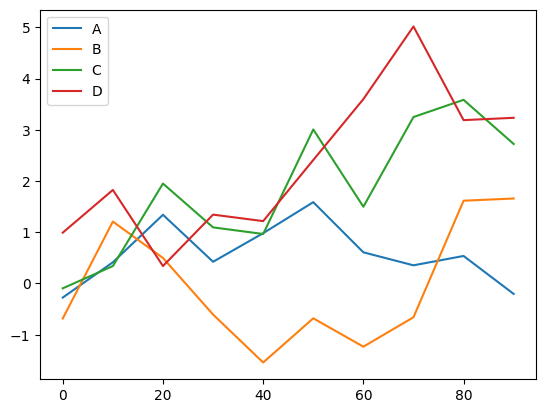

In [12]:
df.plot()

a    0.641914
b    0.275947
c    0.466997
d    0.539655
e    0.540001
f    0.737108
g    0.479667
h    0.074899
i    0.263025
j    0.400557
k    0.319280
l    0.413177
m    0.359270
n    0.867460
o    0.346039
p    0.290239
dtype: float64

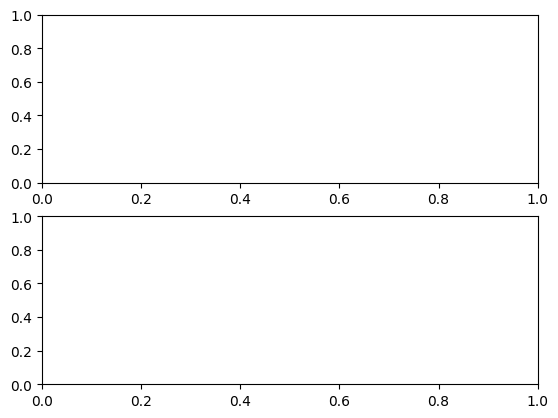

In [14]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data

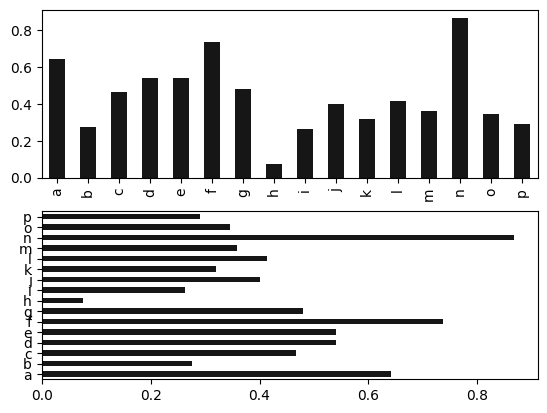

In [16]:
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)
fig

In [18]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),index=["one", "two", "three", "four", "five", "six"],columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

<Axes: >

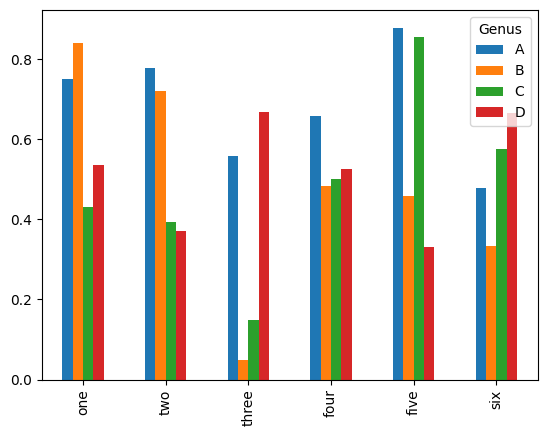

In [19]:
df.plot.bar()

<Axes: >

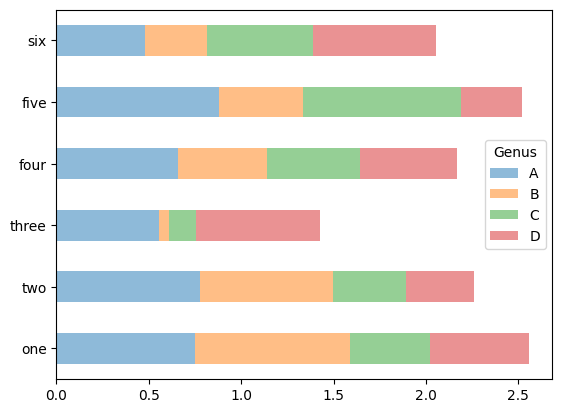

In [20]:
df.plot.barh(stacked=True, alpha=0.5)

# Sea born

In [21]:
cd ../notes/pydata-book/examples/

/home/master/Dataanalysis/notes/pydata-book/examples


/home/master/Dataanalysis/venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [26]:
tips = pd.read_csv('tips.csv')

In [29]:
party_count = pd.crosstab(tips['day'], tips['size'])

In [31]:
party_count = party_count.reindex(index=["Thur", "Fri", "Sat", "Sun"])

In [32]:
party_count

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [33]:
party_count = party_count.loc[:, 2:5]

In [34]:
party_count

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


<Axes: xlabel='day'>

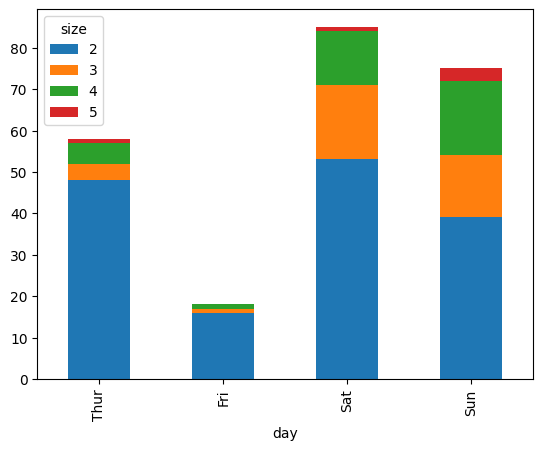

In [35]:
party_count.plot.bar(stacked=True)

In [36]:
import seaborn as sns

In [37]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='day'>

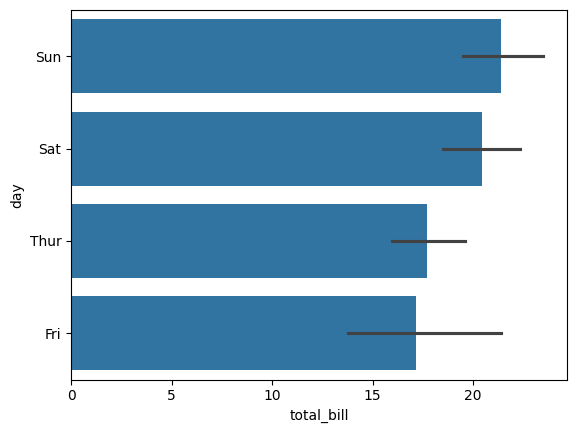

In [38]:
sns.barplot(x='total_bill', y='day', data=tips, orient="h")

In [39]:
macro = pd.read_csv("macrodata.csv")

In [48]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [51]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()

In [52]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


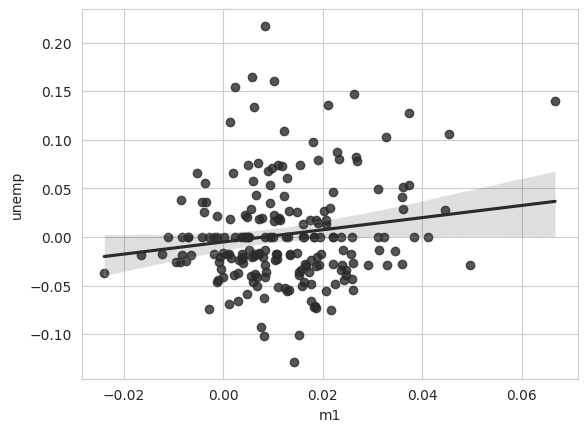

In [56]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")
ax = sns.regplot(x='m1', y='unemp', data=trans_data)

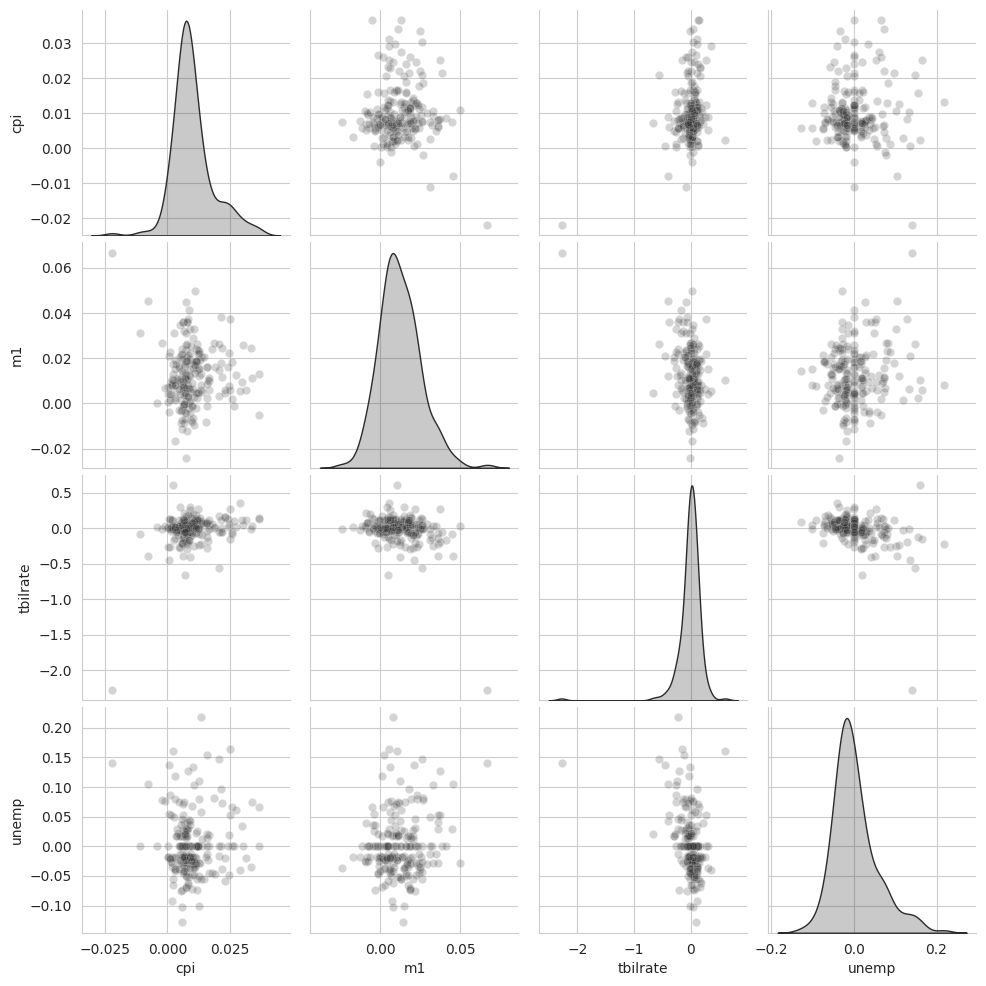

In [57]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})